## Homework 6

First, the imports...

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.signal as scsig
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

In [2]:
#supress scientific notation
np.set_printoptions(suppress=True)

### Exarcise 2

Let's load the data:

In [3]:
Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

(a) Bellow is an attemt of plotting the data in four dimensions: a 3-d diagram with the fourth dimension as the color. As we can see, all data points seem to be coming from the same distribution.

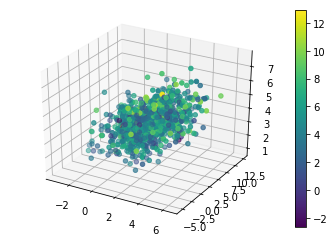

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c = X1[:, 3])
fig.colorbar(img)
plt.show()

Since our data assumingly come from the same distribution, a Gaussian one, we will first compute the mean and covariance matrices and then calculate the asked values of pdf. 

In [5]:
#mean matrix calculation
mean_X1 = np.mean(X1,axis = 0)

#covariance matrix calculation
cov_X1 = 0
m = mean_X1.reshape(4,1)
N = len(X1)
for n in range(N):
    cov_X1+=((m-X1[n].reshape(4,1)).dot((m-X1[n].reshape(4,1)).T))/N

In [6]:
X = [[2.01, 2.99, 3.98, 5.02],[20.78, -15.26, 19.38, -25.02], [3.08, 3.88, 4.15, 6.02]]
for i in range(len(X)):
    print("Value of pdf for point %s is %6f"%(X[i], multivariate_normal.pdf(X[i],mean_X1,cov_X1)))

Value of pdf for point [2.01, 2.99, 3.98, 5.02] is 0.003379
Value of pdf for point [20.78, -15.26, 19.38, -25.02] is 0.000000
Value of pdf for point [3.08, 3.88, 4.15, 6.02] is 0.001952


(b) By plotting the second data set we can see that points come from two Gaussian distributions. Thus, we cannot use the sme method to calculate values of pdf as before.

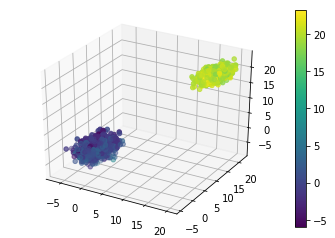

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c = X2[:, 3])
fig.colorbar(img)
plt.show()

Using Gaussian Mixture Model to calculate pdfs. The likelihoods on the last step are calculated by raising to e since score_samples gives log-likelihoods.

In [8]:
model = GaussianMixture(n_components = 2).fit(X2)
X = [[0.05, 0.15, -0.12, -0.08],
     [7.18, 7.98, 9.12, 9.94],
     [3.48, 4.01, 4.55, 4.96],
     [20.78, -15.26, 19.38, -25.02]]

In [9]:
for i in range(len(X)):
    print("Value of pdf for point %s is %6f"%(X[i], np.exp(model.score_samples(X)[i])))

Value of pdf for point [0.05, 0.15, -0.12, -0.08] is 0.001578
Value of pdf for point [7.18, 7.98, 9.12, 9.94] is 0.000000
Value of pdf for point [3.48, 4.01, 4.55, 4.96] is 0.000000
Value of pdf for point [20.78, -15.26, 19.38, -25.02] is 0.000000


### Exercise 3

Read image from huble telescope.

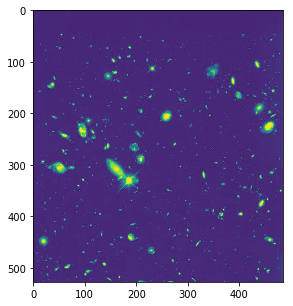

In [10]:
A = mpimg.imread('huble_tel.jpg')
fig = figure(figsize=(5, 5))
plt.imshow(A)

C consists of 15 arrays (one per noisy image). Each array is filled with zeros.

In [11]:
M = np.shape(A)[0]
N = np.shape(A)[1]
C = np.zeros((15, M, N))

Now, let' s add the image plus Gaussian noise to each array of C. In each loop we will produce 528x485 array of noise and then add this to the 528x485 huble image.

In [12]:
for i in range(len(C)):
    B = np.random.normal(0, 1, size=(M, N))*np.sqrt(256)
    C[i] = A + B

Let's plot some of the noisy images:

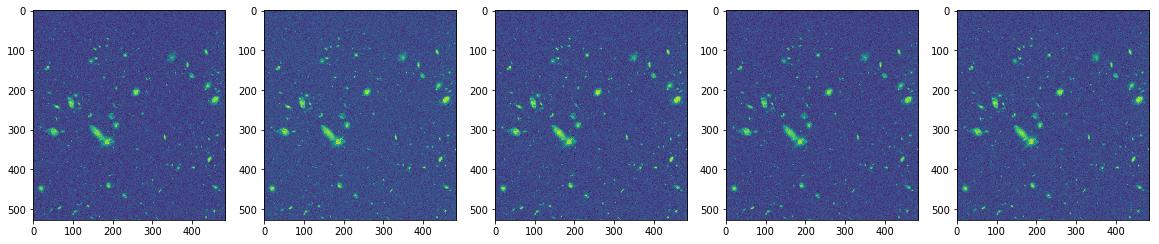

In [13]:
fig = figure(figsize=(20, 10))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.imshow(C[i])

And now plot the mean of all the noisy images:

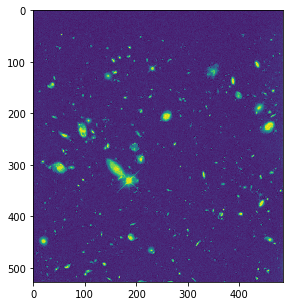

In [14]:
fig = figure(figsize=(5, 5))
C = C.mean(0)
plt.imshow(C)

We can observe that the final image is very close to the original and much clearer than each one of the noisy images. This is due to the fact that the added noise follows a zero mean Gaussian distribution. The average/mean of all noisy images leads to a noise cancelation, and as a result a clear image. In real conditions, if we had nothing but 15 noisy images, we could have produced a clear one.